# Assignment 2: CRISP-DM Model with Titanic Dataset (max. 10 points)

Goal of this assignment is to apply **CRISP-DM** process model for given dataset of Titanic passengers.

* First you load **Titanic** dataset, and then extract more information from the dataset and visualize the results.
* Also, two basic machine learning classification models are implemented. 

You can find Titanic dataset from the *data/* subdirectory:
[Titanic dataset](data/titanic.csv).
Use this dataset in the Assignment 3.

### Add your information

In [1]:
# TODO: Replace with your name or names
student_name = 'Jaka Cosic Hämäläinen'
student_email = 'aa6111@student.jamk.fi'

## 2.1: Business Understanding (max. 1 points)

In this phase, you should define your project goals and success criteria.

**Question**: Can you think what these could be for this assignment?

* **TODO**: Define project goals and success criteria.

**The goal** is to predict survival of passengers in the Titanic disaster.

**Success criteria**:
* Achieve a high prediction accuracy, using metrics such as accuracy, precision, recall, and F1-score to measure model performance
* Building a clear model to understand which features have the most impact on survival

## 2.2: Data Understanding (max. 3 points)

In the "Data Understanding" phase of this CRISP-DM project, you aim to get a grasp of your dataset and its characteristics.

What can you do in this phase?

1. Structure of dataset. Understand the dataset's structure like the number of features (columns), the data types of each feature, and the size of the dataset.
2. Summary statistics. Calculate summary statistics for numerical features, such as mean, median etc.
3. Missing values. Identify the missing values of the dataset.
4. Data visualization. Create data visualizations to gain insights of the data.
5. Outlier detection. Identify and examine potential outliers. You can use chart types like box plots or scatter plots to visualize outliers.

Complete these five tasks using Titanic dataset. Remember also to add Markdown cells to your Jupyter Notebook documents to explain.

Use also different styles in Markdown text: lists, figures, highlights, bold, italic, links, even direct quotes, etc.
It makes Jupyter Document easier to read and highlights the key points.

###  Structure of Dataset

Load Titanic dataset, and then show few lines of data and information of column types.

In [2]:
# TODO: Structure of dataset

import pandas as pd

file_path = 'data/titanic.csv'
df = pd.read_csv(file_path, low_memory = False)

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Summary Statistics
Show basic summary and information of the dataset.

In [3]:
# TODO: Summary statistics

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing Values
Calculate missing values in the dataset.

Count NaN values in each column.

In [4]:
# TODO: Missing values

df.isnull().sum()

# Calculate % of missing values per column
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Missing %': missing_percent,
})
missing_summary.sort_values(by='Missing %', ascending=False)


,Missing Values,Missing %
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


### Visualization

Visualize survivors, passenger ages, survival rate etc. Then try to find different ways to visualize data.

Ideas what to visualize:
* the count of survivors.
* the distribution of passenger ages.
* the survival rate by passenger class.
* the survival rate by gender.
* the survival rate by passenger class and gender.
* more visualization ideas from you?

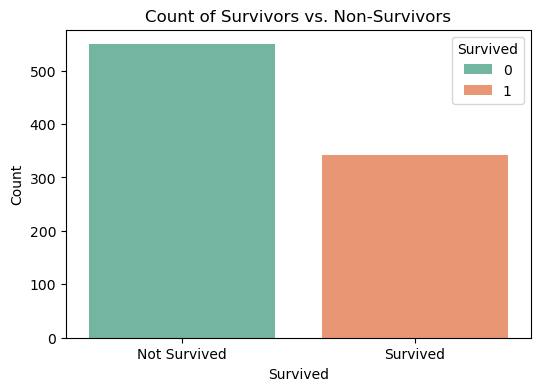

In [5]:
# TODO: Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Count of survivors
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, hue= 'Survived', palette='Set2')
plt.title('Count of Survivors vs. Non-Survivors')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

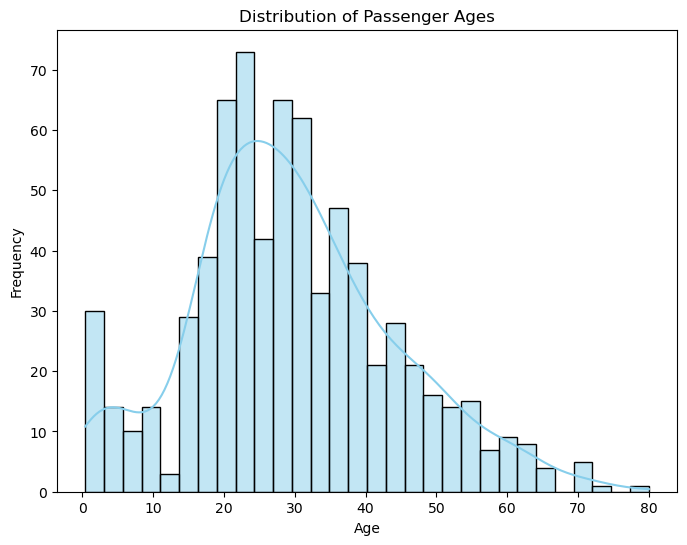

In [6]:
# Distribution of passenger ages
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

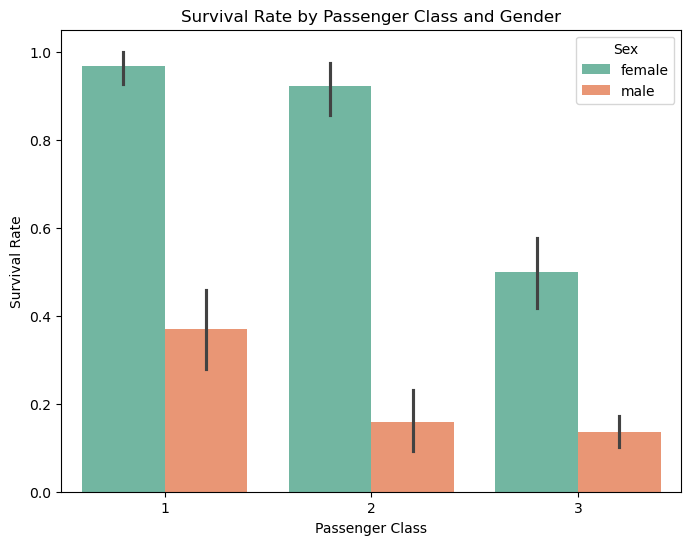

In [7]:
# Survival rate by class and gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, palette='Set2')
plt.title('Survival Rate by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

### Outlier Detection
One important step for the quality of the data is to implement **Outlier Detection**.

How to detect outliers?

* You can detect outliers using **visual inspection** of the dataset by creating scatter plots, histograms, box plots etc.
* You can use statistical methods like **Z-Score** or **IQR**.

**Z-Score**: Calculate the z-score for each data point. If the z-score is significantly different from zero (> 2 or < -2), it may be an outlier.

Using the **IQR**, the outlier data points are the ones falling below Q1 – 1.5 IQR or above Q3 + 1.5 IQR.
The Q1 is the 25th percentile, and Q3 is the 75th percentile of the dataset, and IQR represents the _interquartile_ range calculated by _(Q3–Q1)_.

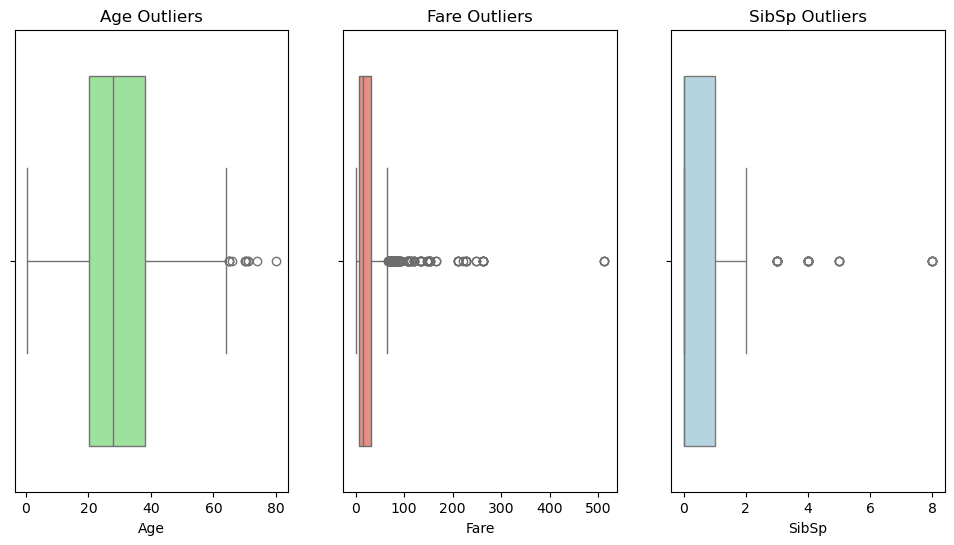

In [8]:
# TODO: Outlier detection

# Box plot for identifying outliers in 'Age', 'Fare', and 'SibSp'
plt.figure(figsize=(12, 6))

# Box plot for Age
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Age'], color='lightgreen')
plt.title('Age Outliers')

# Box plot for Fare
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Fare'], color='salmon')
plt.title('Fare Outliers')

# Box plot for SibSp
plt.subplot(1, 3, 3)
sns.boxplot(x=df['SibSp'], color='lightblue')
plt.title('SibSp Outliers')

plt.show()


Tried calculating Z-score, but it caused a bit of confusion in the dataset down the line, when modeling part started.
To simplify, only visuals are kept to show the outliers. 

In [9]:
# from scipy.stats import zscore

# # Calculate z-scores for Age, Fare, and SibSp
# df[['Age_zscore', 'Fare_zscore', 'SibSp_zscore']] = df[['Age', 'Fare', 'SibSp']].apply(zscore)

# # Identify outliers: z-score > 3 or z-score < -3
# outliers_age = df[df['Age_zscore'].abs() > 3]
# outliers_fare = df[df['Fare_zscore'].abs() > 3]
# outliers_sibsp = df[df['SibSp_zscore'].abs() > 3]

# # Display outliers
# print("Outliers based on z-score:")
# print(f"Age Outliers: \n{outliers_age[['Age', 'Age_zscore']]}\n")
# print(f"Fare Outliers: \n{outliers_fare[['Fare', 'Fare_zscore']]}\n")
# print(f"SibSp Outliers: \n{outliers_sibsp[['SibSp', 'SibSp_zscore']]}")

## 2.3: Data Preprocessing (max. 3 points)

Data preprocessing is an important step to ensure your dataset is ready for machine learning phase.
Here are your most important tasks for data preprocessing phase with the Titanic dataset.

1. Handling missing values. You should decide how to handle missing values.
2. Feature engineering. You can create new features or transform existing ones. With this dataset, you can extract titles from passenger names, create a family size feature, have a passenger a cabin or not, or categorize age and fare into groups.
3. Visualization. Do visualization with new features. Also recalculate statistics after data is preprocessed.
4. Categorical variable encoding. You need to encode categorical variables for a machine learning model. Select method from one-hot encoding, label encoding or ordinal encoding.
5. Feature scaling. Scaling features, such as age or fare. Select standardization or min-max scaling method for scaling.

### Handling Missing Values
NaN (and Inf) values are problems for ML models.

In [10]:
# TODO: Handling missing values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Handling missing data:**

* `Age`: Has many missing values. We'll fill it with the median age.

* `Cabin`: Too many missing values (~77% missing). We'll create a new feature: `HasCabin` = 1 if cabin is known, 0 if not, and drop the actual `Cabin` column.

* `Embarked`: Only 2 missing values. We'll fill them with the most common value (mode).

In [11]:
# Handle missing Age
df['Age'] = df['Age'].fillna(df['Age'].median())

# Create binary HasCabin feature
df['HasCabin'] = df['Cabin'].notnull().astype(int)
df.drop(columns=['Cabin'], inplace=True)

# Fill missing Embarked values with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [12]:
# Check for any remaining null values

df.isnull().sum()

#df.head()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
HasCabin       0
dtype: int64

### Feature Engineering

You can create new features or transform existing ones.

Some ideas what new features/columns to create:
* Create a new feature `HasCabin` (has a cabin or not).
* Create a new feature `HasEmbarked` (has an embarkation port or not).
* Extract `ticketNumber` and ``ticketPrefix`` features of tickets.
* Create a new feature `FamilySize`.
* Create a new feature `Deck` from `Cabin` column.
* Extract a new feature `title` from the `Name`.
* More ideas from you.

Extra Question: Are there any passengers who share the same ticket number?

In [13]:
# TODO: Feature engineering

import numpy as np

# Create new feature 'FamilySize' by combining 'SibSp'(is there a spouse) and 'Parch'(parents with children)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Temporarily reload Cabin if needed
if 'Cabin' not in df.columns:
    df_full = pd.read_csv('data/titanic.csv')  # or path to original
    df['Deck'] = df_full['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'Unknown')
else:
    df['Deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'Unknown')

df.info()

df.head()

#df.to_csv("titanic_feature_engineered.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  HasCabin     891 non-null    int32  
 12  FamilySize   891 non-null    int64  
 13  Deck         891 non-null    object 
dtypes: float64(2), int32(1), int64(6), object(5)
memory usage: 94.1+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,FamilySize,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,Unknown


In [14]:
# Extra Question: Are there passengers who share the same ticket number?

shared_tickets = df[df.duplicated('Ticket', keep=False)].sort_values('Ticket')
num_shared = shared_tickets['Ticket'].nunique()

print(f"There are {num_shared} unique ticket numbers shared by multiple passengers.")
shared_tickets[['Ticket', 'Name', 'Pclass', 'Fare']]

There are 134 unique ticket numbers shared by multiple passengers.


,Ticket,Name,Pclass,Fare
257,110152,"Cherry, Miss. Gladys",1,86.500
759,110152,"Rothes, the Countess. of (Lucy Noel Martha Dye...",1,86.500
504,110152,"Maioni, Miss. Roberta",1,86.500
262,110413,"Taussig, Mr. Emil",1,79.650
558,110413,"Taussig, Mrs. Emil (Tillie Mandelbaum)",1,79.650
...,...,...,...,...
736,W./C. 6608,"Ford, Mrs. Edward (Margaret Ann Watson)",3,34.375
86,W./C. 6608,"Ford, Mr. William Neal",3,34.375
147,W./C. 6608,"Ford, Miss. Robina Maggie ""Ruby""",3,34.375
540,WE/P 5735,"Crosby, Miss. Harriet R",1,71.000


### Visualize New Features

Do visualization with selected new features.

Some ideas what to visualize:
* Visualize based on ticket prefixes.
* Visualize based on ticket numbers.
* Show the survivors based on `Pclass` and embarkation port.
* Also other new features can be used to visualization.

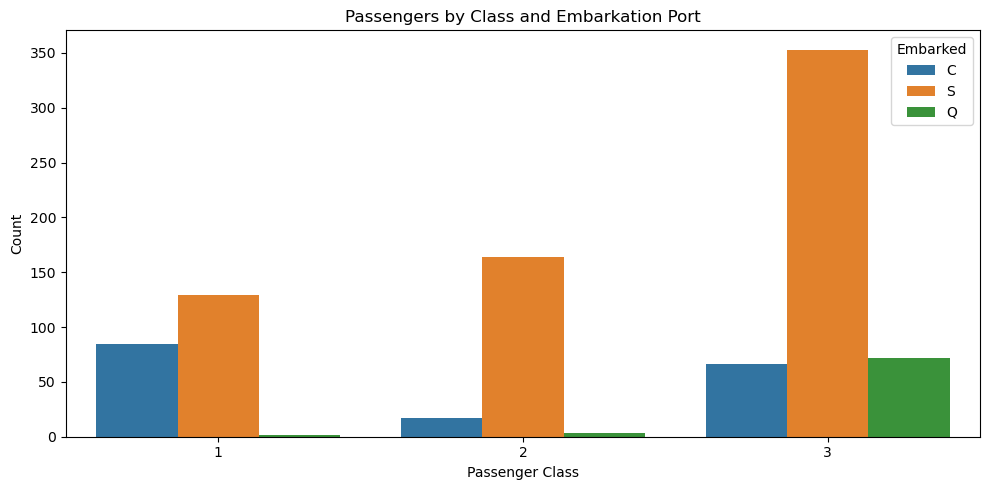

<Figure size 1000x500 with 0 Axes>

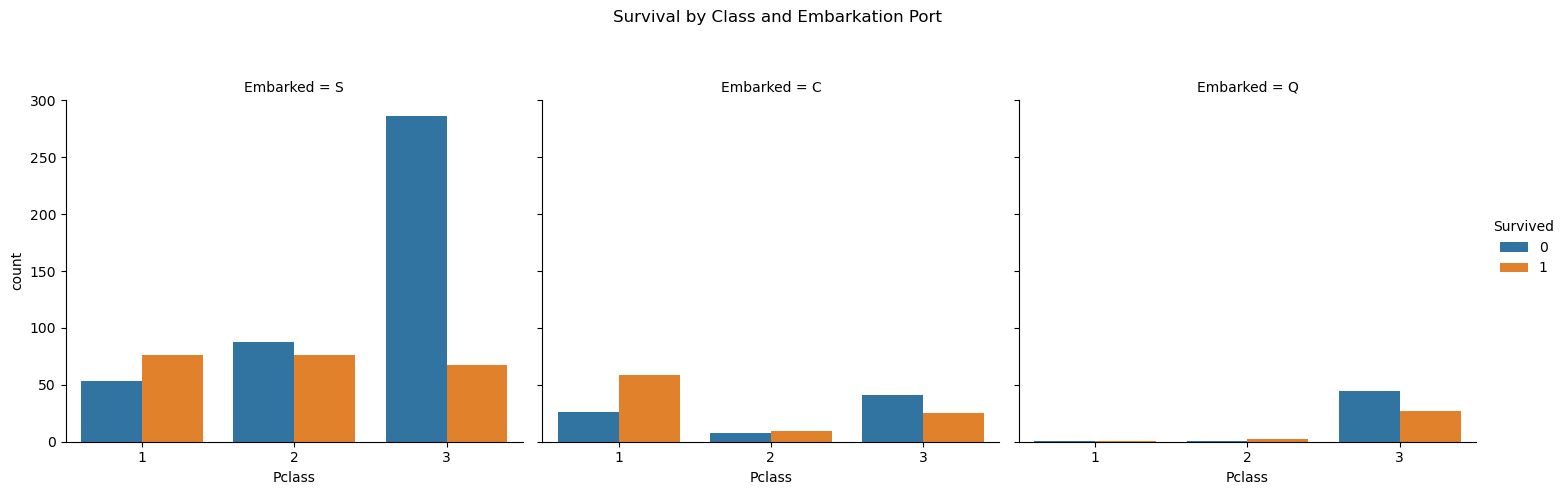

In [15]:
# TODO: Visualization

# Passengers by Class and Embarkation Port
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Pclass', hue='Embarked')
plt.title('Passengers by Class and Embarkation Port')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Embarked')
plt.tight_layout()
plt.show()

# Add survival breakdown
plt.figure(figsize=(10, 5))
sns.catplot(data=df, x='Pclass', hue='Survived', col='Embarked', kind='count')
plt.subplots_adjust(top=0.8)
plt.suptitle('Survival by Class and Embarkation Port')
plt.show()


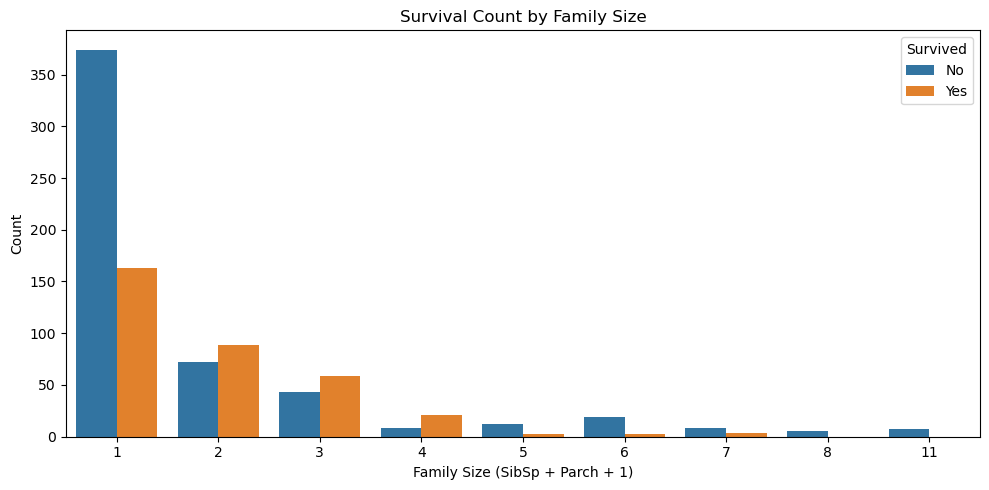

In [16]:
# Survival Count by Family Size
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='FamilySize', hue='Survived')
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size (SibSp + Parch + 1)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

### Categorical Variable Encoding

Why categorical variable encoding?

 * Since most machine learning models accept only numerical variables, you need to encode categorical variables.
 * Select your encoding method from these: one-hot encoding, label encoding, or ordinal encoding.

In [17]:
# TODO: Categorical variable encoding

# Label Encoding column 'Sex'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])

embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)

deck_dummies = pd.get_dummies(df['Deck'], prefix='Deck')
df = pd.concat([df, deck_dummies], axis=1)

# drop columns containing objects
df = df.drop(columns=['Name', 'Sex', 'Ticket', 'Embarked', 'Deck'])

In [18]:
# check the encoded values
#df[['Sex', 'Sex_encoded']].head()
#df.filter(like='Embarked_').head()
#df.filter(like='Deck_').head()

In [19]:
# check the newly encoded columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Age           891 non-null    float64
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Fare          891 non-null    float64
 7   HasCabin      891 non-null    int32  
 8   FamilySize    891 non-null    int64  
 9   Sex_encoded   891 non-null    int32  
 10  Embarked_C    891 non-null    bool   
 11  Embarked_Q    891 non-null    bool   
 12  Embarked_S    891 non-null    bool   
 13  Deck_A        891 non-null    bool   
 14  Deck_B        891 non-null    bool   
 15  Deck_C        891 non-null    bool   
 16  Deck_D        891 non-null    bool   
 17  Deck_E        891 non-null    bool   
 18  Deck_F        891 non-null    

### Feature Scaling

Why perform feature scaling?

* Most machine learning methods benefit from scaled features.
* Scale all numerical features for a machine learning model.
* Features in your dataset might have different scales, which can vary widely.

There are several common methods for feature scaling:

1. **Min-Max Scaling** scales features to a specific range (commonly 0 to 1 or -1 to 1).
2. **Standardization** (Z-Score) scales features to have a mean of 0 and a standard deviation of 1.
3. **Robust Scaling** uses the median and interquartile range to scale features.

In [20]:
# TODO: Feature scaling

from sklearn.preprocessing import StandardScaler

# Select columns to scale
num_cols_to_scale = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[num_cols_to_scale] = scaler.fit_transform(df[num_cols_to_scale])


To avoid any mistakes in loading datasets, from this step forward only the cleaned, preprocessed dataset will be used. 
The data processed to this point has been saved locally to *cleaned_titanic_data.csv*

In [21]:
# Save cleaned data to a separate file
df.to_csv('cleaned_titanic_data.csv', index=False)

## 2.4: Modelling (max. 3 points)

Target is to do **Titanic Survival Prediction with Machine Learning**.
You should build and compare machine learning models for predicting passenger survival on the Titanic.

1) Data splitting

    * Split the dataset into training and testing sets (e.g., _80% training_ and _20% testing_) to evaluate model performance.

2) Modeling

    * Implement two different classifiers: **k-Nearest Neighbors** (kNN), and **Random Forest** (RF).
    * Train each model on the training data.

3) Model evaluation

    * Evaluate the performance of each model on the testing data using evaluation metrics such as accuracy, precision and F1-score.

4) Comparison

    * Compare the results of the classifiers to determine which one performs the best in terms of survival prediction.

5) Conclusion

    * Summarize your findings and provide insights into which model is most suitable for predicting Titanic passenger survival based on the dataset.
    * Include visualizations and explanations to explain your findings.

Note: You may consider hyperparameter tuning for the classifiers and further data exploration to enhance your analysis.
You can find with hyperparameter tuning the best configuration for each model. This can increase the performance of your model.

### Preprocessing Data for Machine Learning

Select the features and target variable for an ML process.

Process (replace or delete) all rows with `NaN` values.

**Target Variable (Survival):**
* The target variable for prediction is Survived, which is either 0 (did not survive) or 1 (survived).

**Features:**
* We'll use the relevant columns that can help predict survival. All columns will be considered in their importance for survival

In [22]:
# TODO: Preprocessing

# Load newly saved dataset
df_cleaned = pd.read_csv('cleaned_titanic_data.csv')

df_cleaned.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,HasCabin,FamilySize,Sex_encoded,...,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown
0,1,0,3,-0.565736,0.432793,-0.473674,-0.502445,0,0.059160,1,...,True,False,False,False,False,False,False,False,False,True
1,2,1,1,0.663861,0.432793,-0.473674,0.786845,1,0.059160,0,...,False,False,False,True,False,False,False,False,False,False
2,3,1,3,-0.258337,-0.474545,-0.473674,-0.488854,0,-0.560975,0,...,True,False,False,False,False,False,False,False,False,True
3,4,1,1,0.433312,0.432793,-0.473674,0.420730,1,0.059160,0,...,True,False,False,True,False,False,False,False,False,False
4,5,0,3,0.433312,-0.474545,-0.473674,-0.486337,0,-0.560975,1,...,True,False,False,False,False,False,False,False,False,True


In [23]:
# Extra step to ensure there are no NaN values
df_cleaned = df_cleaned.dropna()

# Select features and target variable
X = df_cleaned.drop(['Survived'], axis=1)  # All columns except 'Survived' will be features
y = df_cleaned['Survived']  # 'Survived' is the target variable

# Check the shape of the resulting datasets
X.shape, y.shape

((891, 21), (891,))

### Data Splitting

Split the data into **training** and **test sets**.

Use the following properties for split the data in this assignment:

* `y` is the target variable to predict.
* `Test_size=0.2` specifies that 20% of the data will be used for testing.
* `Random_state=42` is used to set a seed for the random number generator, and it ensures that the split will be reproducible.
* `Stratify=y` ensures that the class distribution in the target variable is preserved in both the training and testing sets.

In [24]:
# TODO: Data splitting
# X_train, X_test, y_train, y_test = train_test_split(..., test_size=0.2, random_state=42, stratify=y)

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((712, 21), (179, 21), (712,), (179,))

### Modeling
Implement these **two different** machine learning classification models:

1. **k-Nearest Neighbors (kNN) Classification**
2. **Random Forest (RF) Classification**

Then train the models and make predictions using trained ML models with separate test data.

In [25]:
# TODO: Modeling with kNN and Random Forest.
#  Clearly separate these models and results you got by using different variable names for different models.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models
knn_model = KNeighborsClassifier(n_neighbors=5)  # kNN with k=5, default choice
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Random Forest with 100 trees

# Train kNN model
knn_model.fit(X_train, y_train)

# Make predictions with kNN model
knn_predictions = knn_model.predict(X_test)

# Train Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions with Random Forest model
rf_predictions = rf_model.predict(X_test)

In [26]:
# Evaluate kNN model
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("kNN Model Accuracy:", knn_accuracy)
print("kNN Classification Report:\n", classification_report(y_test, knn_predictions))

# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Model Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

kNN Model Accuracy: 0.5810055865921788
kNN Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.74      0.68       110
           1       0.44      0.33      0.38        69

    accuracy                           0.58       179
   macro avg       0.54      0.53      0.53       179
weighted avg       0.56      0.58      0.57       179

Random Forest Model Accuracy: 0.7653631284916201
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       110
           1       0.70      0.70      0.70        69

    accuracy                           0.77       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



#### Feature importance values

Show the feature importance values of an ML learning process in descending order if it's possible with the ML method used.

This can only be done for *Random Forest* model, since *KNN* treats all features equally.
The *Feature Importance* is visualized for better understanding.

Feature Importance (Random Forest):
Sex_encoded: 0.2257
PassengerId: 0.1711
Fare: 0.1639
Age: 0.1483
Pclass: 0.0586
FamilySize: 0.0454
HasCabin: 0.0353
Deck_Unknown: 0.0294
SibSp: 0.0271
Parch: 0.0241
Embarked_S: 0.0166
Embarked_C: 0.0140
Embarked_Q: 0.0084
Deck_E: 0.0074
Deck_C: 0.0060
Deck_D: 0.0056
Deck_B: 0.0051
Deck_A: 0.0044
Deck_F: 0.0018
Deck_G: 0.0011
Deck_T: 0.0006


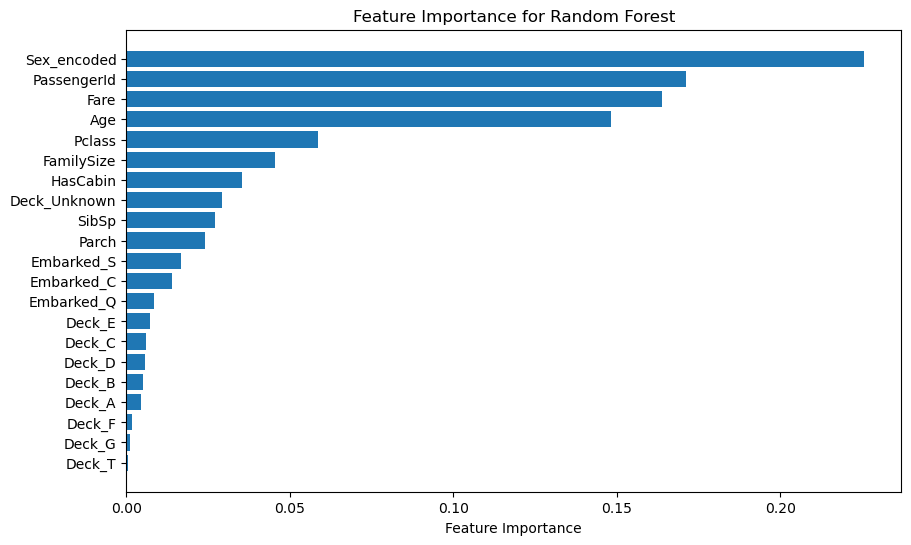

In [27]:
# TODO: Feature importance values (only if the values can be obtained).

import matplotlib.pyplot as plt

# Extract feature importance values from Random Forest model
rf_feature_importance = rf_model.feature_importances_

# Create a list of tuples (feature, importance) to pair features with their importance values
feature_importance = list(zip(X_train.columns, rf_feature_importance))

# Sort the feature importance values in descending order
sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Display the sorted feature importance
print("Feature Importance (Random Forest):")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh([feature for feature, _ in sorted_feature_importance], [importance for _, importance in sorted_feature_importance])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

### Model Evaluation

Evaluate the performance of both models. Calculate metrics that can be compared.

**Metrics used for evaluation:**
* Accuracy
* Precision
* Recall
* F1 Score
* Confusion Matrix

In [28]:
# TODO: Evaluation of both models

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions using the kNN model
knn_predictions = knn_model.predict(X_test)

# Make predictions using the Random Forest model
rf_predictions = rf_model.predict(X_test)

# Evaluate kNN model
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, average='weighted')
knn_recall = recall_score(y_test, knn_predictions, average='weighted')
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)

# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

# Print the results for both models
print("kNN Model Evaluation:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1-Score: {knn_f1:.4f}")
print("Confusion Matrix (kNN):")
print(knn_conf_matrix)

print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print("Confusion Matrix (Random Forest):")
print(rf_conf_matrix)


kNN Model Evaluation:
Accuracy: 0.5810
Precision: 0.5624
Recall: 0.5810
F1-Score: 0.5666
Confusion Matrix (kNN):
[[81 29]
 [46 23]]

Random Forest Model Evaluation:
Accuracy: 0.7654
Precision: 0.7654
Recall: 0.7654
F1-Score: 0.7654
Confusion Matrix (Random Forest):
[[89 21]
 [21 48]]


**Plotted the values to easily compare the values between the two models**

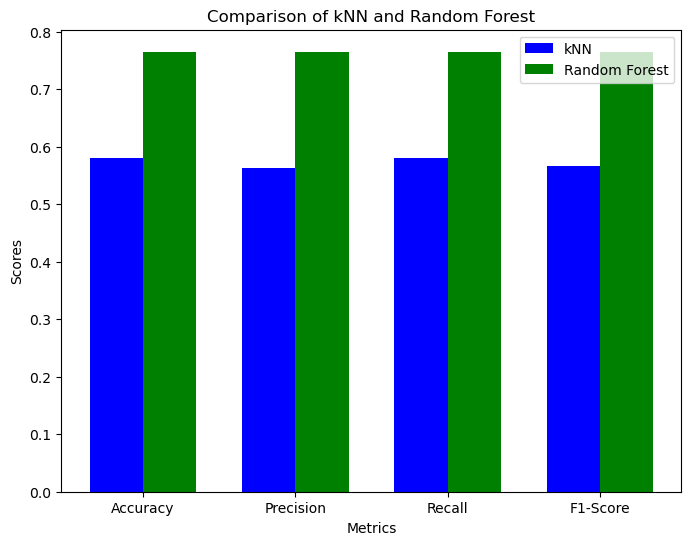

In [29]:
import matplotlib.pyplot as plt

# Create a dictionary to store the metric values for both models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
knn_values = [knn_accuracy, knn_precision, knn_recall, knn_f1]
rf_values = [rf_accuracy, rf_precision, rf_recall, rf_f1]

# Create a bar plot
x = range(len(metrics))
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(x, knn_values, width, label='kNN', color='blue')
bar2 = ax.bar([p + width for p in x], rf_values, width, label='Random Forest', color='green')

# Add labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of kNN and Random Forest')
ax.set_xticks([p + width/2 for p in x])
ax.set_xticklabels(metrics)
ax.legend()

# Display the plot
plt.show()

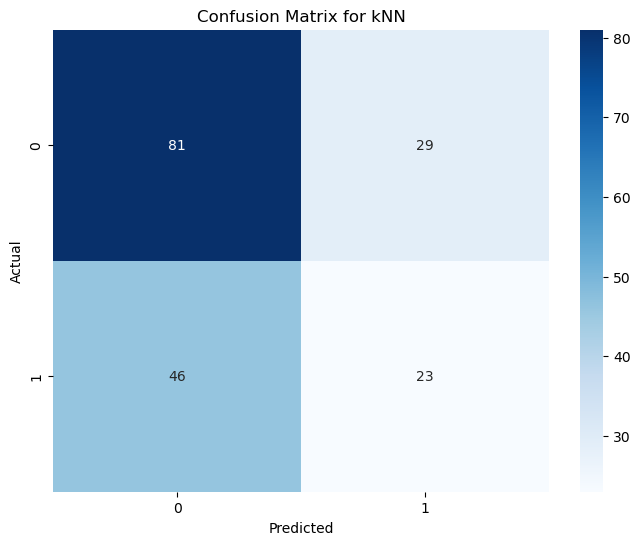

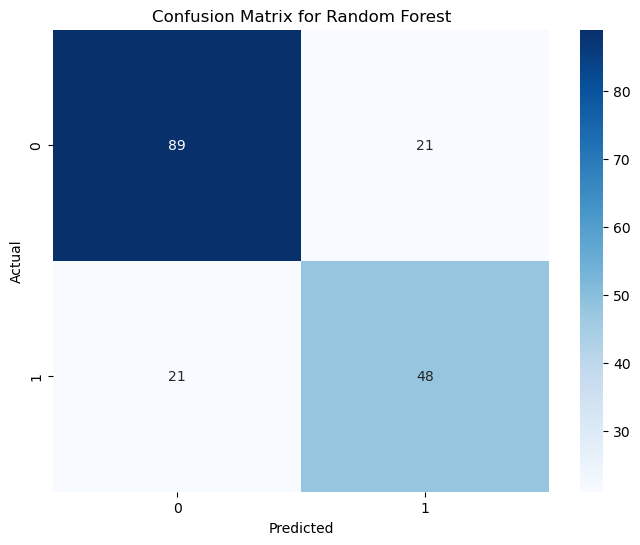

In [30]:
# Visualize the kNN confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.title("Confusion Matrix for kNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize the Random Forest confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Comparison

Compare the results of the classifiers.

Comparing results by calculating error rates for the two models:
* Error Rate (misclassification error rates)
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)

In [31]:
# TODO: Comparison of results

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate the misclassification rate (error rate)
knn_error_rate = 1 - knn_accuracy
rf_error_rate = 1 - rf_accuracy

# Calculate the errors for kNN predictions
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_rmse = np.sqrt(knn_mse)

# Calculate the errors for Random Forest predictions
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)

# Print error rate
print("kNN Error Rate:", knn_error_rate)
print("Random Forest Error Rate:", rf_error_rate)

# Print error metrics for both models
print("\nkNN Error Metrics:")
print(f"MAE: {knn_mae:.4f}")
print(f"MSE: {knn_mse:.4f}")
print(f"RMSE: {knn_rmse:.4f}")

print("\nRandom Forest Error Metrics:")
print(f"MAE: {rf_mae:.4f}")
print(f"MSE: {rf_mse:.4f}")
print(f"RMSE: {rf_rmse:.4f}")

kNN Error Rate: 0.4189944134078212
Random Forest Error Rate: 0.23463687150837986

kNN Error Metrics:
MAE: 0.4190
MSE: 0.4190
RMSE: 0.6473

Random Forest Error Metrics:
MAE: 0.2346
MSE: 0.2346
RMSE: 0.4844


### Conclusion

Summarize your findings.

**TODO: Your Conclusion: (write this conclusion with Markdown)**

To summarize the outcomes for *k-Nearest Neighbors* (kNN) and *Random Forest* (RF) classification models, we will focus on:
* Model Performance
* Errors and Evaluation Metrics
* Feature Importance

**Model Performance:**

The *Random Forest* model outperformed the kNN model across multiple metrics, including accuracy, precision, recall, and F1-score. This suggests that *Random Forest* is more effective in capturing the underlying patterns in the dataset, especially for this classification problem.

**Errors and Evaluation Metrics:**

The Error Rate for *Random Forest* was lower (0.23) compared to *kNN* (0.42), indicating better overall performance in terms of misclassification.

The *Mean Absolute Error (MAE)*, *Mean Squared Error (MSE)*, and *Root Mean Squared Error (RMSE)* were all much lower for *Random Forest*, which means fewer errors and better generalization to the unseen data.

The *kNN* model showed higher error values, particularly in RMSE (0.647), suggesting that it might struggle more with overfitting or underfitting depending on values chose for the distance metric and k.

The visualisations of the comparison of accuracy, precision, recall, and F1-score clearly shows that *Random Forest* provides a more balanced and reliable performance across all evaluation metrics.

The *Confusion Matrix* also shows that *Random Forest* is more reliable, with better results for True Positives and True Negatives. This results in better overall performance *kNN* model has significantly more False negatives (46) compared to *RF* (21).

**Feature Importance:**

The *Random Forest* model allows for easy interpretation of feature importance, which could be useful for understanding which features most influence the model's predictions. While *kNN* does not provide direct feature importance, its performance still indicates that it was able to handle the data effectively. 

`Sex`, `Age` and `Fare` showed most influence on the model's predictions. An erro here was to keep the `PassengerID` was not dropped before so it shows high influence, even though it does not have significant meaning for the dataset. 

**Final Comments:**

The goal is to achieve "achieve a high prediction accuracy, using metrics such as accuracy, precision, recall, and F1-score to measure model performance". *Random Forest* appears to be the preferred choice for this dataset. 
*The goal* was to predict survival of passengers in the Titanic disaster and *RF* does this with 76.5% accuracy. It is also easier to evaluate which features most impact survival. 

*kNN* model, while simple and effective, did not not perform as well.

In summary, both models have their strengths and weaknesses, but for this classification task, *Random Forest* demonstrated superior performance in terms of generalization, error reduction, and overall accuracy.